In [3]:
# Import necessary libraries
import pandas as pd
import os

# Set path to dataset folder
data_path = 'C:/Users/alial/OneDrive/Desktop/LHL/applications of ml assignments/sf-crime'

# Load the CSV files
train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test.csv'))

# Show basic information
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()

Train shape: (878049, 9)
Test shape: (884262, 7)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64


<Axes: ylabel='Category'>

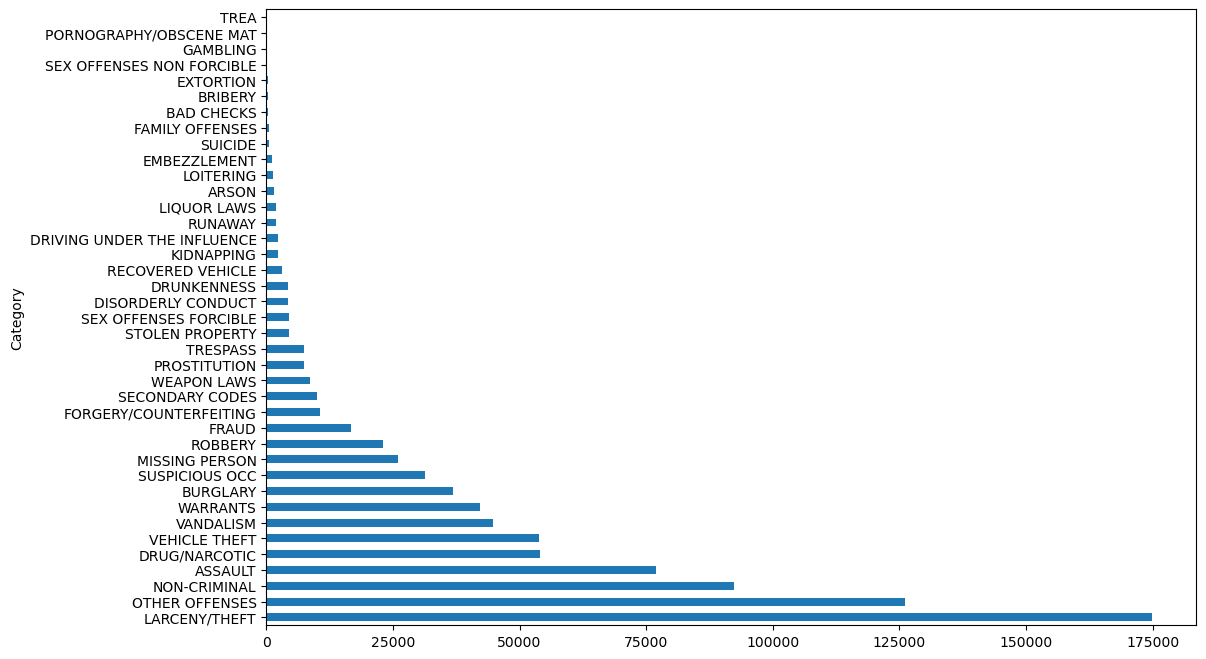

In [4]:
# Check for missing values
print(train_df.isnull().sum())

# Class distribution
train_df['Category'].value_counts().plot(kind='barh', figsize=(12,8))

In [5]:
from sklearn.preprocessing import LabelEncoder

# Parse datetime
train_df['Dates'] = pd.to_datetime(train_df['Dates'])
train_df['Hour'] = train_df['Dates'].dt.hour
train_df['Month'] = train_df['Dates'].dt.month
train_df['Day'] = train_df['Dates'].dt.day
train_df['Year'] = train_df['Dates'].dt.year
train_df['DayOfWeek'] = train_df['DayOfWeek'].astype('category')
train_df['PdDistrict'] = train_df['PdDistrict'].astype('category')

# Encode target
le = LabelEncoder()
train_df['CategoryEncoded'] = le.fit_transform(train_df['Category'])

# Define features
features = ['PdDistrict', 'DayOfWeek', 'Hour', 'Month', 'Day', 'Year', 'X', 'Y']
X = pd.get_dummies(train_df[features])
y = train_df['CategoryEncoded']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

model = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    num_class=len(le.classes_),
    use_label_encoder=False,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names=le.classes_))


C:\Users\alial\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:28:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Accuracy: 0.2774272535732589
                             precision    recall  f1-score   support

                      ARSON       0.00      0.00      0.00       303
                    ASSAULT       0.21      0.08      0.11     15375
                 BAD CHECKS       0.00      0.00      0.00        81
                    BRIBERY       0.00      0.00      0.00        58
                   BURGLARY       0.21      0.01      0.02      7351
         DISORDERLY CONDUCT       0.19      0.03      0.05       864
DRIVING UNDER THE INFLUENCE       0.00      0.00      0.00       454
              DRUG/NARCOTIC       0.32      0.42      0.37     10794
                DRUNKENNESS       0.00      0.00      0.00       856
               EMBEZZLEMENT       0.00      0.00      0.00       233
                  EXTORTION       0.00      0.00      0.00        51
            FAMILY OFFENSES       0.25      0.03      0.05        98
     FORGERY/COUNTERFEITING       0.16      0.01      0.02    

c:\Users\alial\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alial\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alial\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
# Repeat feature engineering steps on test_df
test_df['Dates'] = pd.to_datetime(test_df['Dates'])
test_df['Hour'] = test_df['Dates'].dt.hour
test_df['Month'] = test_df['Dates'].dt.month
test_df['Day'] = test_df['Dates'].dt.day
test_df['Year'] = test_df['Dates'].dt.year
test_df['DayOfWeek'] = test_df['DayOfWeek'].astype('category')
test_df['PdDistrict'] = test_df['PdDistrict'].astype('category')

X_test = pd.get_dummies(test_df[features])
X_test = X_test.reindex(columns=X.columns, fill_value=0)  # align columns with training

# Predict class probabilities
y_test_proba = model.predict_proba(X_test)

In [9]:
submission = pd.DataFrame(y_test_proba, columns=le.classes_)
submission.insert(0, 'Id', test_df['Id'])
submission.to_csv('submission.csv', index=False)

In [10]:
import os
print("Saved to:", os.getcwd())

Saved to: c:\Users\alial\OneDrive\Desktop\LHL\applications of ml assignments\sf-crime


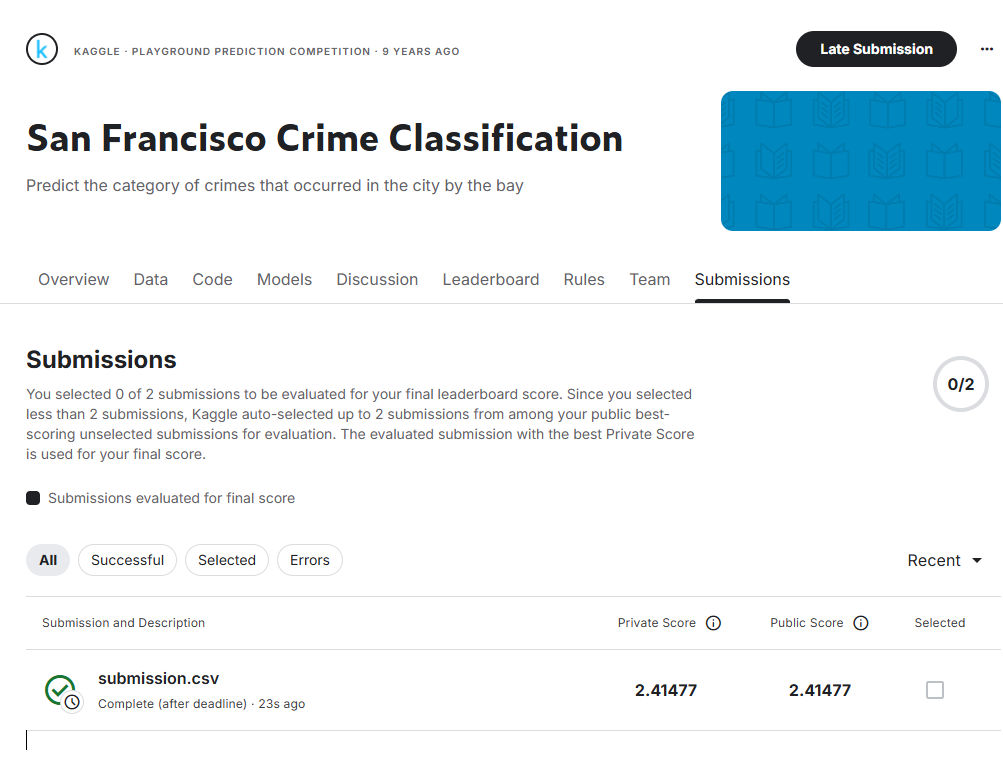